# Anjali Yadav

# Explorotary Data Analysis Terrorism (Level - Intermediate)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py

In [2]:
#loading the data
terrorism_data = pd.read_csv('C:/Users/USER/Downloads/Global Terrorism - START data/globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1") #ISO-8859-1 , latin1 are done to read from utf 

C:\Users\USER\AppData\Local\Temp\ipykernel_1932\4159002806.py:2: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terrorism_data.shape

(181691, 135)

In [5]:
terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
for i in terrorism_data.columns:
  print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [7]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
# renaming some important columns
terrorism_data = terrorism_data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State', 
                                          'city':'City', 'attacktype1_txt':'Attack_type','targtype1_txt':'Target_type', 'nkill':'Killed', 'summary':'Summary',
                                          'targsubtype1_txt':'Target_subtype', 'gname':'Gang_name', 'weaptype1_txt':'Weapon_type', 'nwound':'Wounded', 'motive':'Motive'})

In [9]:
#keeping some important column
terrorism_data = terrorism_data[['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'latitude', 'longitude', 'Attack_type', 'Killed', 'Summary',
                           'Target_type', 'Target_subtype', 'Gang_name', 'Weapon_type', 'Wounded', 'Motive']]

In [10]:
terrorism_data

,Year,Month,Day,Country,Region,State,City,latitude,longitude,Attack_type,Killed,Summary,Target_type,Target_subtype,Gang_name,Weapon_type,Wounded,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,NaN,Private Citizens & Property,Named Civilian,MANO-D,Unknown,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,NaN,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,NaN,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,12/31/2017: Assailants opened fire on a Somali...,Military,Military Checkpoint,Al-Shabaab,Firearms,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,12/31/2017: Assailants launched mortars at the...,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),Government Building/Facility/Office,Unknown,Explosives,0.0,NaN


In [11]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   Attack_type     181691 non-null  object 
 10  Killed          171378 non-null  float64
 11  Summary         115562 non-null  object 
 12  Target_type     181691 non-null  object 
 13  Target_subtype  171318 non-null  object 
 14  Gang_name       181691 non-null  object 
 15  Weapon_type     181691 non-null  object 
 16  Wounded         165380 non-null  float64
 17  Motive    

In [12]:
terrorism_data.isna().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
latitude            4556
longitude           4557
Attack_type            0
Killed             10313
Summary            66129
Target_type            0
Target_subtype     10373
Gang_name              0
Weapon_type            0
Wounded            16311
Motive            131130
dtype: int64

In [13]:
terrorism_data['Wounded'] = terrorism_data['Wounded'].fillna(0)
terrorism_data['Killed'] = terrorism_data['Killed'].fillna(0)
terrorism_data['Casualty'] = terrorism_data['Wounded'] + terrorism_data['Killed']

In [14]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   Attack_type     181691 non-null  object 
 10  Killed          181691 non-null  float64
 11  Summary         115562 non-null  object 
 12  Target_type     181691 non-null  object 
 13  Target_subtype  171318 non-null  object 
 14  Gang_name       181691 non-null  object 
 15  Weapon_type     181691 non-null  object 
 16  Wounded         181691 non-null  float64
 17  Motive    

In [15]:
terrorism_data.isna().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
latitude            4556
longitude           4557
Attack_type            0
Killed                 0
Summary            66129
Target_type            0
Target_subtype     10373
Gang_name              0
Weapon_type            0
Wounded                0
Motive            131130
Casualty               0
dtype: int64

In [16]:
terrorism_data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [17]:
attacks=terrorism_data["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


# Data Visualization

# 1. Year wise attack

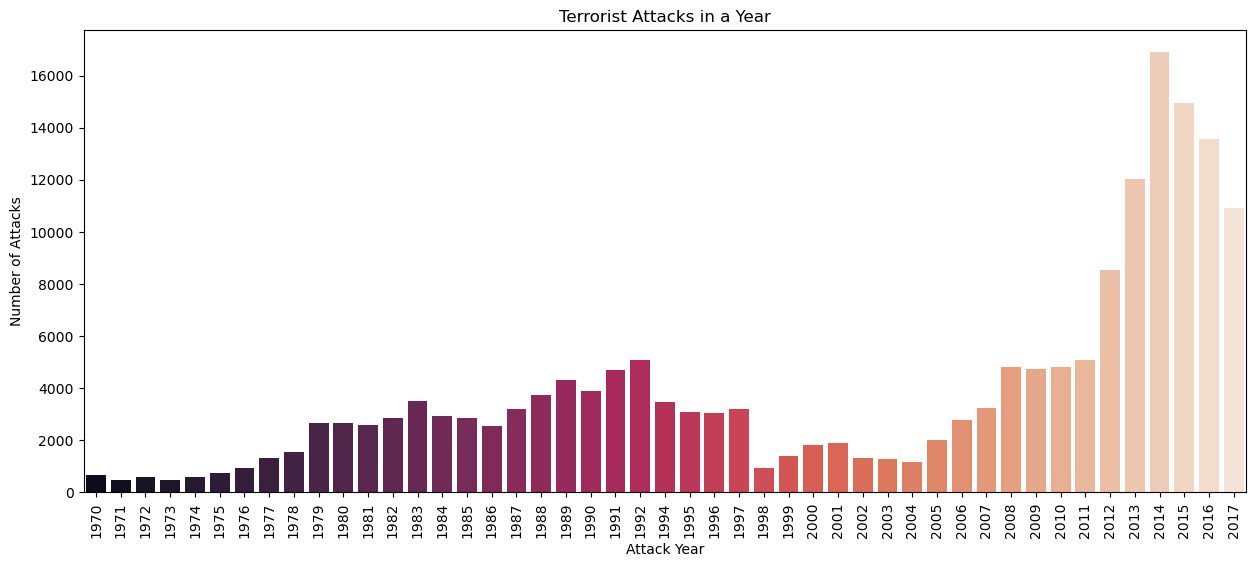

In [18]:
unique_years = terrorism_data['Year'].unique()
years_count = terrorism_data['Year'].value_counts().sort_index()
plt.subplots(figsize=(15,6))
sns.barplot(x=unique_years, y=years_count, palette='rocket')

plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks')
plt.title('Terrorist Attacks in a Year')
plt.show()

# 2. Region wise attack

In [19]:
reg = pd.crosstab(terrorism_data.Year, terrorism_data.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


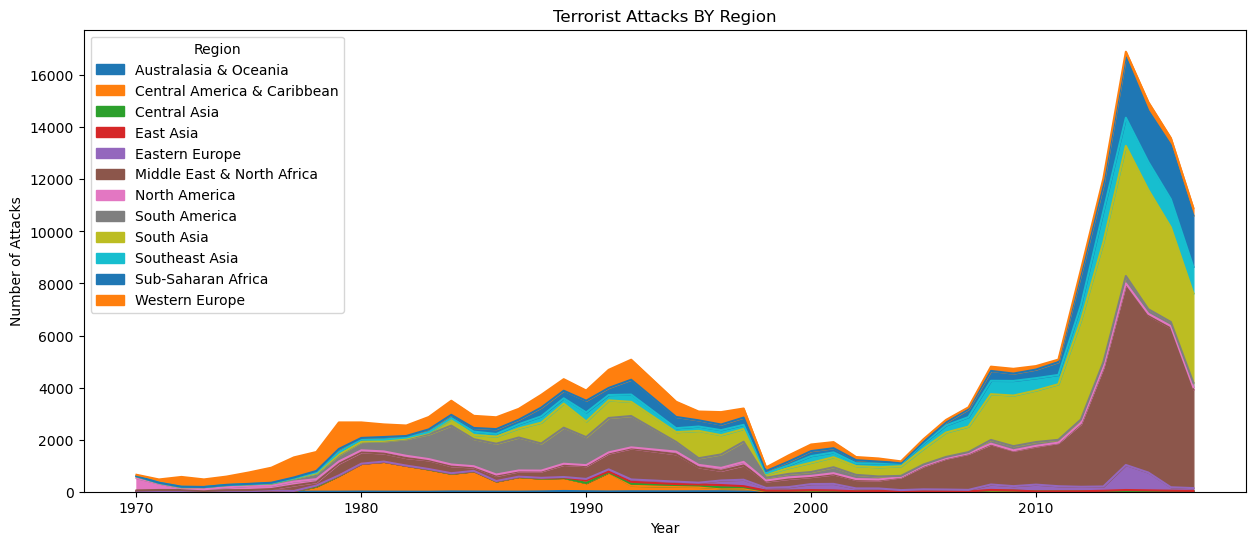

In [20]:
reg.plot(kind='area',figsize=(15,6))
plt.title('Terrorist Attacks BY Region')
plt.ylabel('Number of Attacks')
plt.show()

In [21]:
regt = reg.transpose()
regt["Total"] = regt.sum(axis=1)
ra = regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

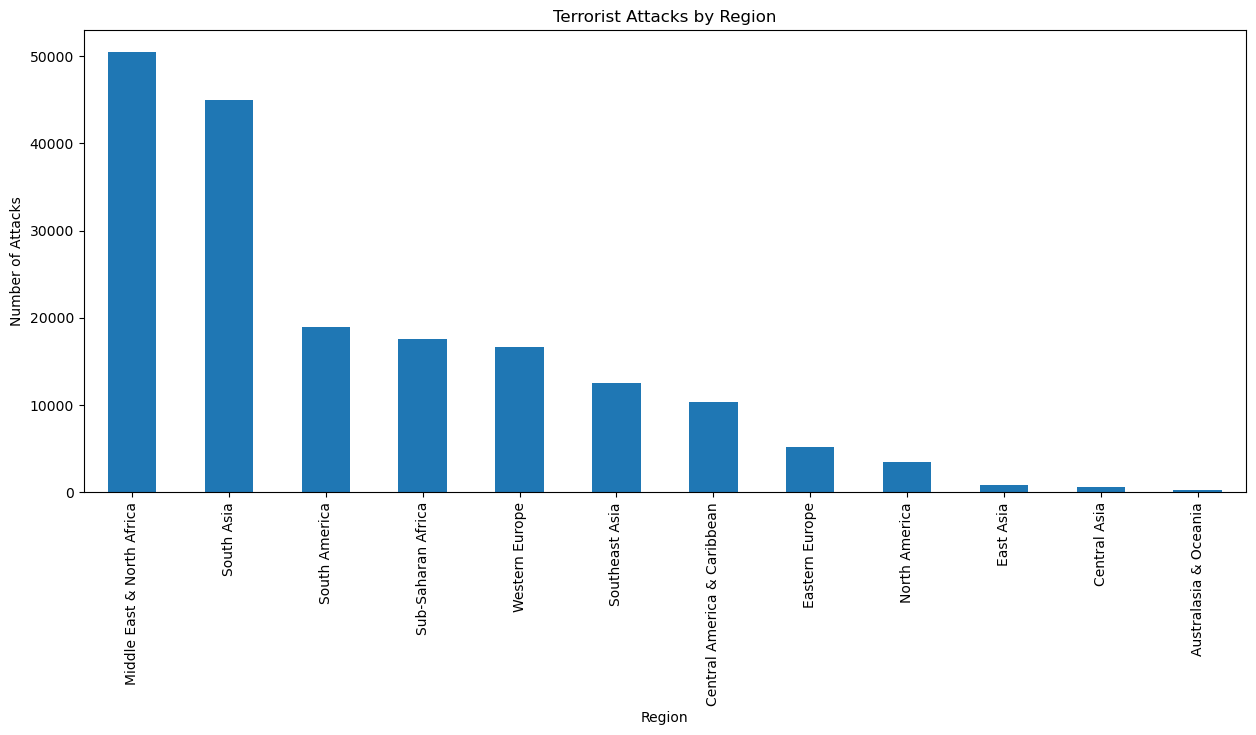

In [22]:
ra.plot(kind="bar", figsize=(15,6))
plt.title('Terrorist Attacks by Region')
plt.ylabel('Number of Attacks')
plt.show()

# 3. Targets of Terrorist Attacks

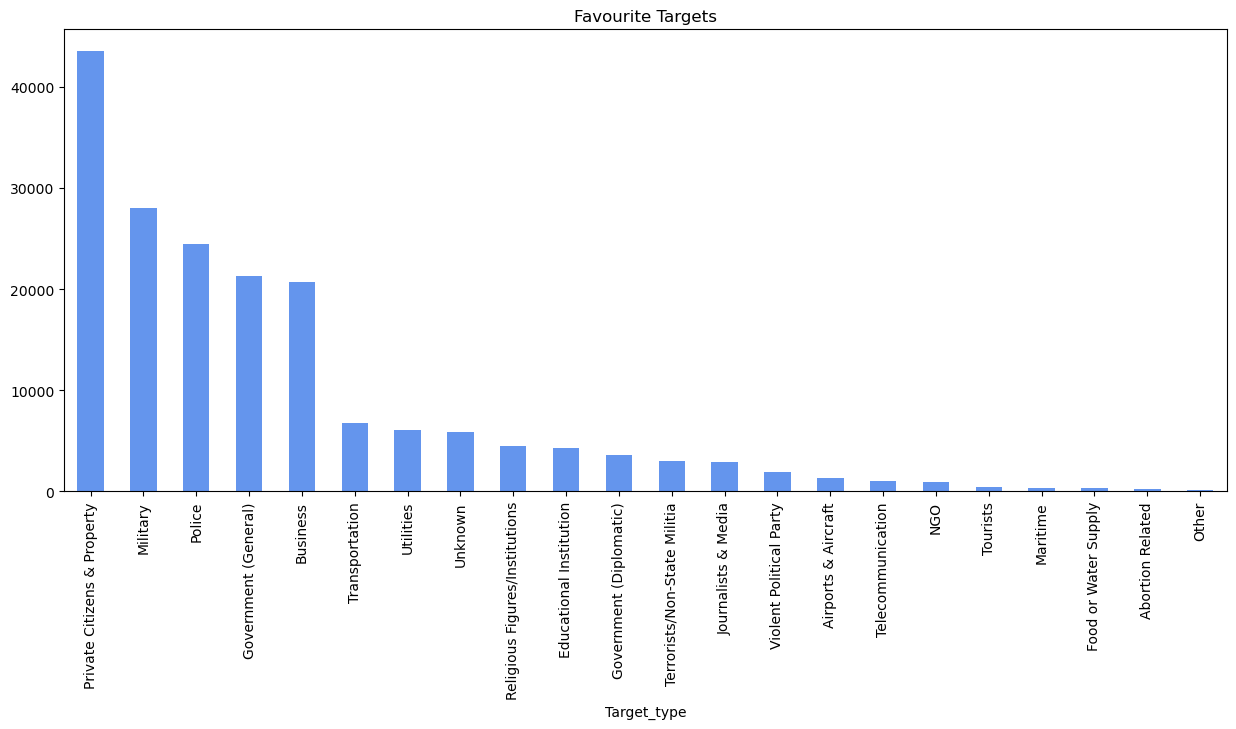

In [23]:
tar = pd.crosstab(terrorism_data.Year, terrorism_data.Target_type)
tart = tar.transpose()
tart["Total"] = tart.sum(axis=1)
ta = tart["Total"].sort_values(ascending=False)
ta.plot(kind="bar",color="cornflowerblue", figsize=(15,6))
plt.title('Favourite Targets')
plt.show()


tare = terrorism_data['Target_type'].value_counts().head(10)
tare.plot(kind="bar", color="cornflowerblue", figsize=(15,6))
plt.title('Favourite Targets')
plt.ylabel('Number of Attacks')
plt.xlabel('Targets')
plt.show()

# 4. Country Wise Attacks

In [24]:
ctry = terrorism_data['Country'].value_counts().head(10)
ctry

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

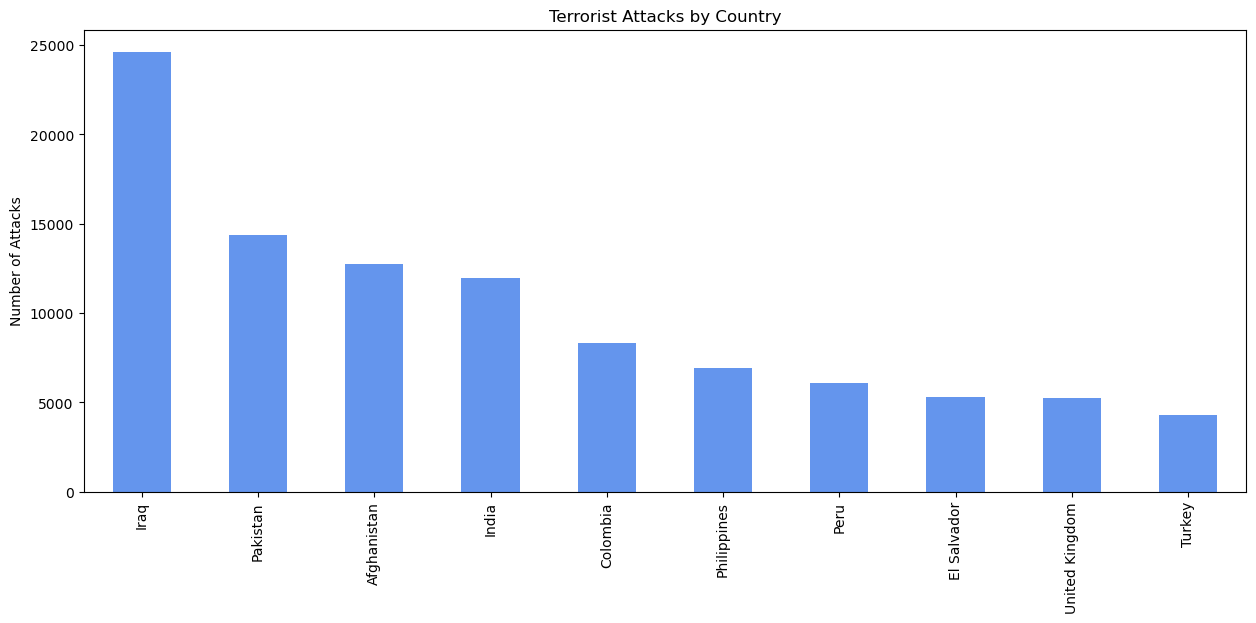

In [25]:
ctry.plot(kind="bar", color="cornflowerblue", figsize=(15,6))
plt.title('Terrorist Attacks by Country')
plt.ylabel('Number of Attacks')
plt.show()

# 5. Total Casualties(Killed + Wounded) in each Country

In [26]:
cas = terrorism_data[["Country", "Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cas.head(10)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


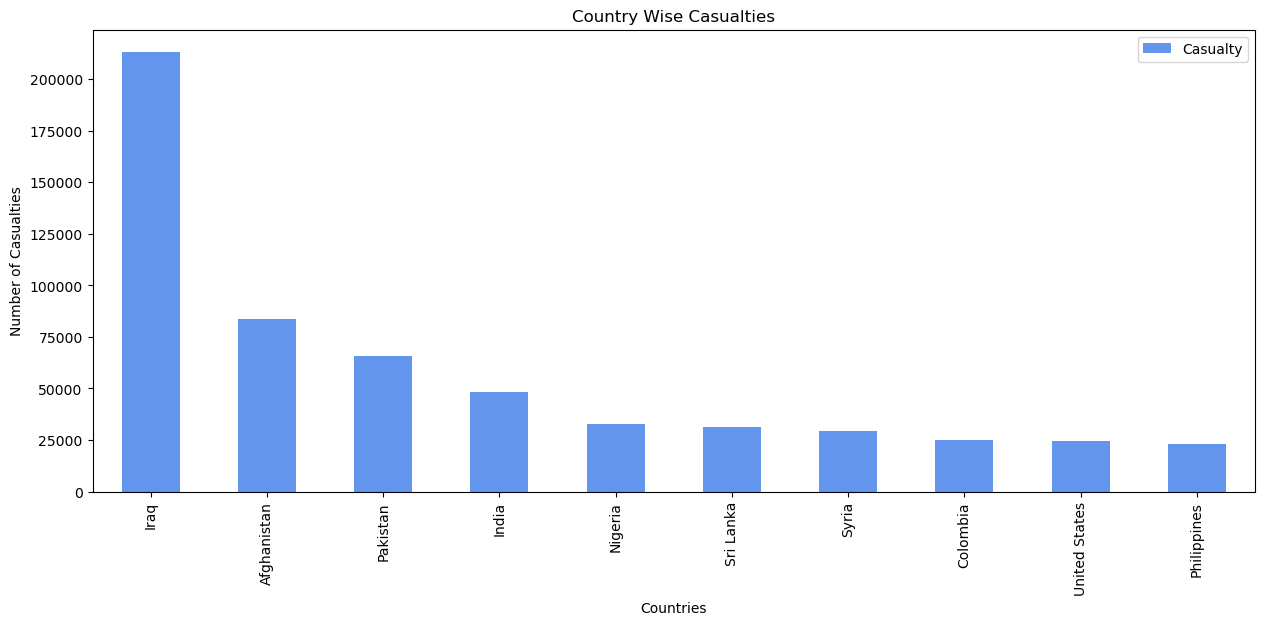

In [27]:
cas[:10].plot(kind="bar", color="cornflowerblue",figsize=(15,6))
plt.title('Country Wise Casualties')
plt.xlabel('Countries')
plt.ylabel('Number of Casualties')
plt.show()

# 6. Attacks by Gang

In [28]:
grp=terrorism_data["Gang_name"].value_counts().head(10)
grp

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

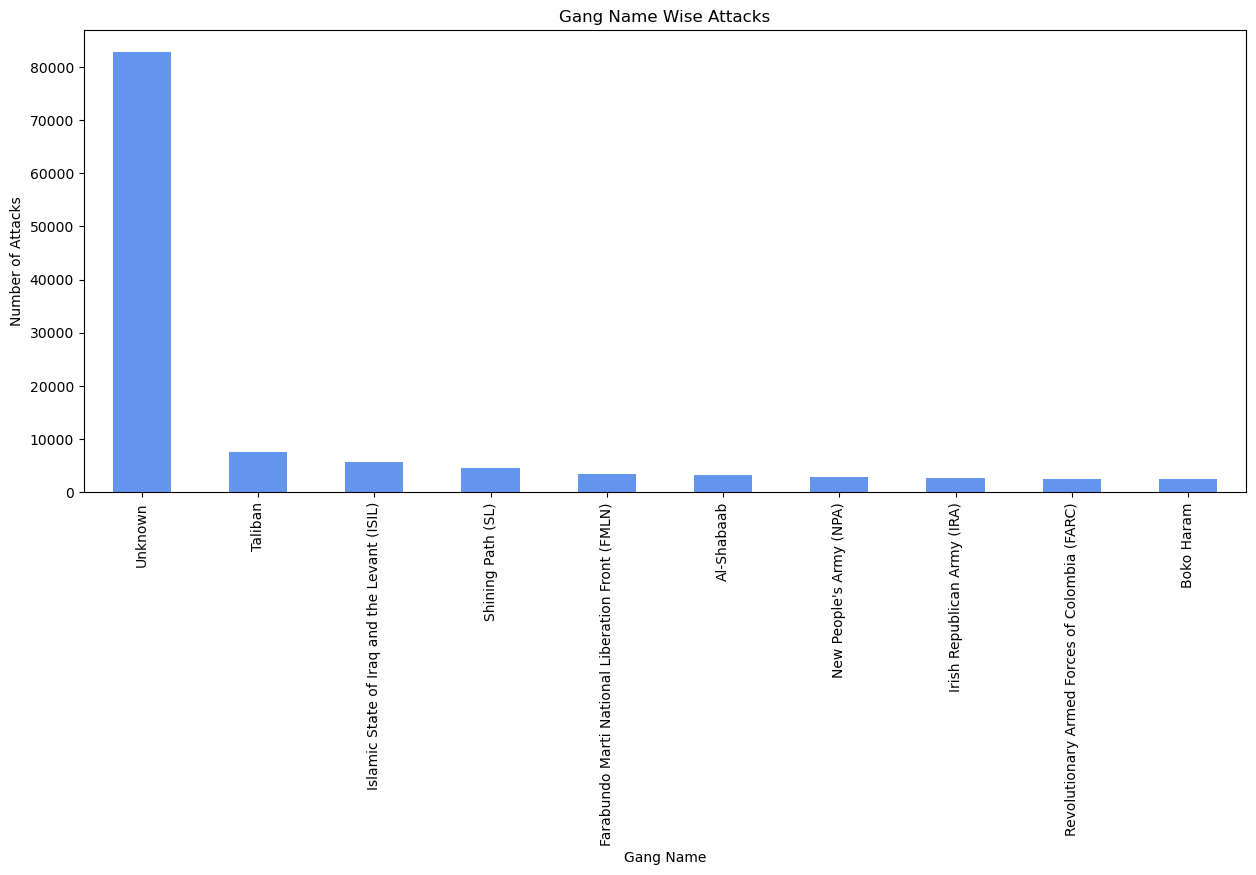

In [29]:
grp[:10].plot(kind="bar", color="cornflowerblue",figsize=(15,6))
plt.title('Gang Name Wise Attacks')
plt.xlabel('Gang Name')
plt.ylabel('Number of Attacks')
plt.show()

In [30]:
#highest number
print("Country with the most attacks:",terrorism_data['Country'].value_counts().index[0])
print("City with the most attacks:",terrorism_data['City'].value_counts().index[1])
print("Region with the most attacks:",terrorism_data['Region'].value_counts().index[0])
print("Gang-Name with the most attacks:",terrorism_data['Gang_name'].value_counts().index[1])
print("Most Attacks Types:",terrorism_data['Attack_type'].value_counts().index[0])

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Gang-Name with the most attacks: Taliban
Most Attacks Types: Bombing/Explosion
